# mini project for Data Science. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('movies.dat', sep = '::', engine = 'python', header = None, names = ['Movie Id','Movie Name','Genre'])

In [3]:
movies.tail(10)

,Movie Id,Movie Name,Genre
3873,3943,Bamboozled (2000),Comedy
3874,3944,Bootmen (2000),Comedy|Drama
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's
3876,3946,Get Carter (2000),Action|Drama|Thriller
3877,3947,Get Carter (1971),Thriller
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [4]:
movies['Year'] = movies['Movie Name'].str.extract( ".*\((.*)\).*" , expand = True)

there are some movies that end with words like The, An, A which had to be at the beginning of the movie name, so we dropped those words

In [5]:
movies['Movie Name'] = movies['Movie Name'].str.replace(', The ()',' ')
movies['Movie Name'] = movies['Movie Name'].str.replace(', A ()',' ')
movies['Movie Name'] = movies['Movie Name'].str.replace(', An ()',' ')

movies['Movie Name'] = movies['Movie Name'].str.replace('&#8230;',' ')

movies['Movie Name'] = movies['Movie Name'].str.replace('�',' ')

<ipython-input-5-db8f274c5a45>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['Movie Name'] = movies['Movie Name'].str.replace(', The ()',' ')
<ipython-input-5-db8f274c5a45>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['Movie Name'] = movies['Movie Name'].str.replace(', A ()',' ')
<ipython-input-5-db8f274c5a45>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['Movie Name'] = movies['Movie Name'].str.replace(', An ()',' ')


In [6]:
movies.tail(10)

,Movie Id,Movie Name,Genre,Year
3873,3943,Bamboozled (2000),Comedy,2000
3874,3944,Bootmen (2000),Comedy|Drama,2000
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's,2000
3876,3946,Get Carter (2000),Action|Drama|Thriller,2000
3877,3947,Get Carter (1971),Thriller,1971
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000
3882,3952,Contender (2000),Drama|Thriller,2000


In [7]:
movies['Movie Id'].nunique()

3883

There are 3883 movies listed

In [8]:
movies.describe()

,Movie Id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [9]:
movies.duplicated().sum()

0

In [10]:
movies['Movie Id'].duplicated().sum()

0

In [11]:
movies['Movie Name'].duplicated().sum()

0

In [12]:
movies.isnull().sum()

Movie Id      0
Movie Name    0
Genre         0
Year          0
dtype: int64

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie Id    3883 non-null   int64 
 1   Movie Name  3883 non-null   object
 2   Genre       3883 non-null   object
 3   Year        3883 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.5+ KB


In [14]:
movies['Year'] = pd.to_numeric(movies['Year'])

In [15]:
movies.dtypes

Movie Id       int64
Movie Name    object
Genre         object
Year           int64
dtype: object

In [16]:
users = pd.read_csv('users.dat', sep = '::', engine = 'python', header = None, names = ['User Id', 'Gender','Age','--','-'])

In [17]:
users= users.iloc[:,:3]
users.sample(5)

,User Id,Gender,Age
4715,4716,F,25
2171,2172,M,18
796,797,F,50
2690,2691,M,18
2844,2845,M,25


In [18]:
users.describe().round()

,User Id,Age
count,6040.0,6040.0
mean,3020.0,31.0
std,1744.0,13.0
min,1.0,1.0
25%,1511.0,25.0
50%,3020.0,25.0
75%,4530.0,35.0
max,6040.0,56.0


minimum is 1 yr old and it is not practically possible for a 1 yr old child to give movie ratings. so we drop the rows that have user age less than 10

In [19]:
users.drop(users[users.Age<10].index, inplace =True)

In [20]:
users['Age'].describe().round()

count    5818.0
mean       32.0
std        12.0
min        18.0
25%        25.0
50%        25.0
75%        35.0
max        56.0
Name: Age, dtype: float64

In [21]:
users.duplicated().sum()

0

In [22]:
users['User Id'].duplicated().sum()

0

In [23]:
users.isnull().sum()

User Id    0
Gender     0
Age        0
dtype: int64

In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 1 to 6039
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User Id  5818 non-null   int64 
 1   Gender   5818 non-null   object
 2   Age      5818 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 181.8+ KB


In [25]:
users['User Id'].nunique()

5818

There are 6040 unique users

In [26]:
ratings = pd.read_csv('ratings.dat', sep = '::', engine = 'python', header = None, names = ['User Id', 'Movie Id','Movie Rating','Timestamp'])

In [27]:
ratings = ratings.drop(columns= 'Timestamp',axis=1)
ratings.tail(2)

,User Id,Movie Id,Movie Rating
1000207,6040,1096,4
1000208,6040,1097,4


In [28]:
ratings.describe().round()

,User Id,Movie Id,Movie Rating
count,1000209.0,1000209.0,1000209.0
mean,3025.0,1866.0,4.0
std,1728.0,1096.0,1.0
min,1.0,1.0,1.0
25%,1506.0,1030.0,3.0
50%,3070.0,1835.0,4.0
75%,4476.0,2770.0,4.0
max,6040.0,3952.0,5.0


In [29]:
ratings.duplicated().sum()

0

In [30]:
ratings.isnull().sum()

User Id         0
Movie Id        0
Movie Rating    0
dtype: int64

In [31]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   User Id       1000209 non-null  int64
 1   Movie Id      1000209 non-null  int64
 2   Movie Rating  1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [32]:
df = pd.merge(movies,ratings, on = 'Movie Id' )
df = pd.merge(df,users, on = 'User Id' )

In [33]:
df.sample(10)

,Movie Id,Movie Name,Genre,Year,User Id,Movie Rating,Gender,Age
549504,1267,Manchurian Candidate (1962),Film-Noir|Thriller,1962,5954,5,M,45
200966,1242,Glory (1989),Action|Drama|War,1989,2041,5,F,25
198338,3608,Pee-wee's Big Adventure (1985),Comedy,1985,2015,4,M,18
393303,318,Shawshank Redemption (1994),Drama,1994,4183,5,M,25
261365,780,Independence Day (ID4) (1996),Action|Sci-Fi|War,1996,2934,4,F,35
879015,296,Pulp Fiction (1994),Crime|Drama,1994,3467,5,M,25
294468,3717,Gone in 60 Seconds (2000),Action|Crime,2000,3312,1,F,18
104502,1873,"Mis rables, Les (1998)",Drama,1998,1177,5,F,25
512967,3175,Galaxy Quest (1999),Adventure|Comedy|Sci-Fi,1999,5545,5,F,35
849291,2003,Gremlins (1984),Comedy|Horror,1984,3961,3,M,25


# EDA

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels

Now we get to start visualizing. Let's plot the distribution of user ratings

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


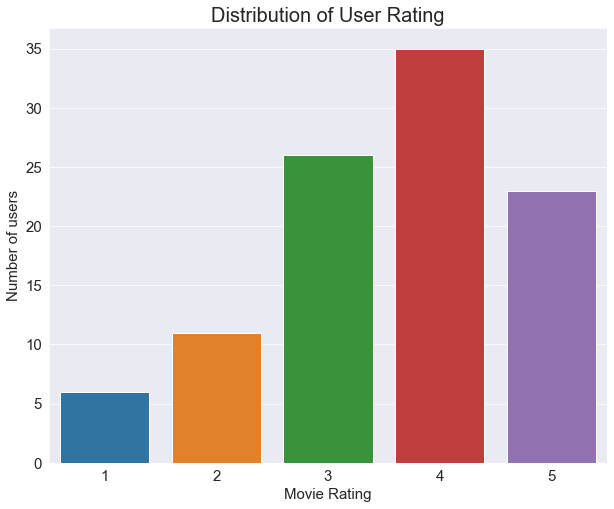

In [35]:
rating_pct = ratings['Movie Rating'].value_counts()*100/ratings['Movie Rating'].count()
rating_pct = rating_pct.round()

plt.figure(figsize = (10,8))
sns.barplot( rating_pct.index,rating_pct)  
plt.ylabel('Number of users')
plt.title('Distribution of User Rating')                
plt.xlabel('Movie Rating');                         

the mean user rating is about a 4 out of 5.Seems like users are more rate movies they liked,  1 out of 5 ratings are very rare.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


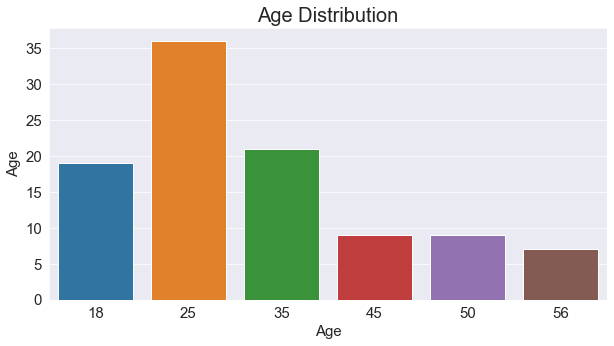

In [36]:
age_pct = users.Age.value_counts()*100/users.Age.count()
age_pct = age_pct.round()

plt.figure(figsize=(10,5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Percentage')
sns.barplot( age_pct.index,age_pct);

mostof the users were youth i.e between 18 to 35... 70% approx

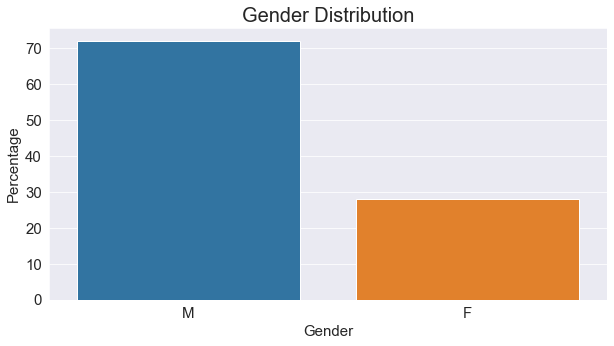

In [37]:
gender_pct = users.Gender.value_counts()*100/users.Gender.count()
gender_pct = gender_pct.round()

plt.figure(figsize=(10,5))
plt.title('Gender Distribution')
sns.barplot( x=gender_pct.index,y=gender_pct)
plt.xlabel('Gender')
plt.ylabel('Percentage');

70% of the total users are males, only 30% are females

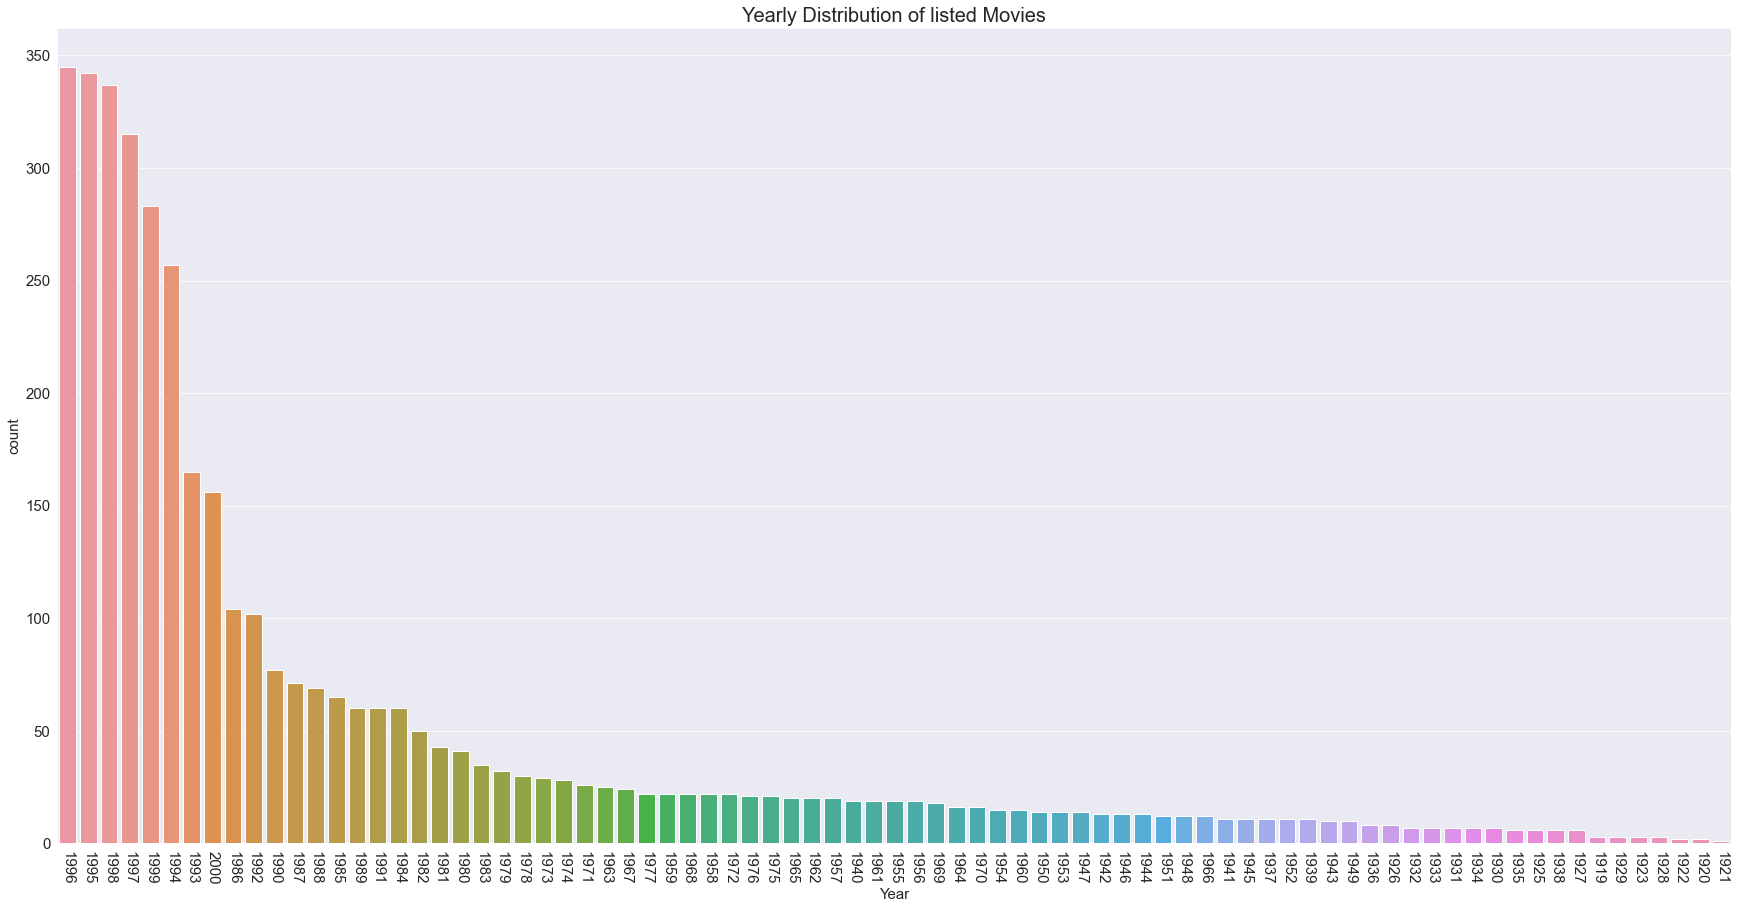

In [38]:
plt.subplots(figsize=(30,15))
sns.countplot(x='Year',order = movies['Year'].value_counts().index, data = movies)
plt.xticks(rotation = -90)
plt.title('Yearly Distribution of listed Movies');

most of the listed movies were released in years 1995 to 1998

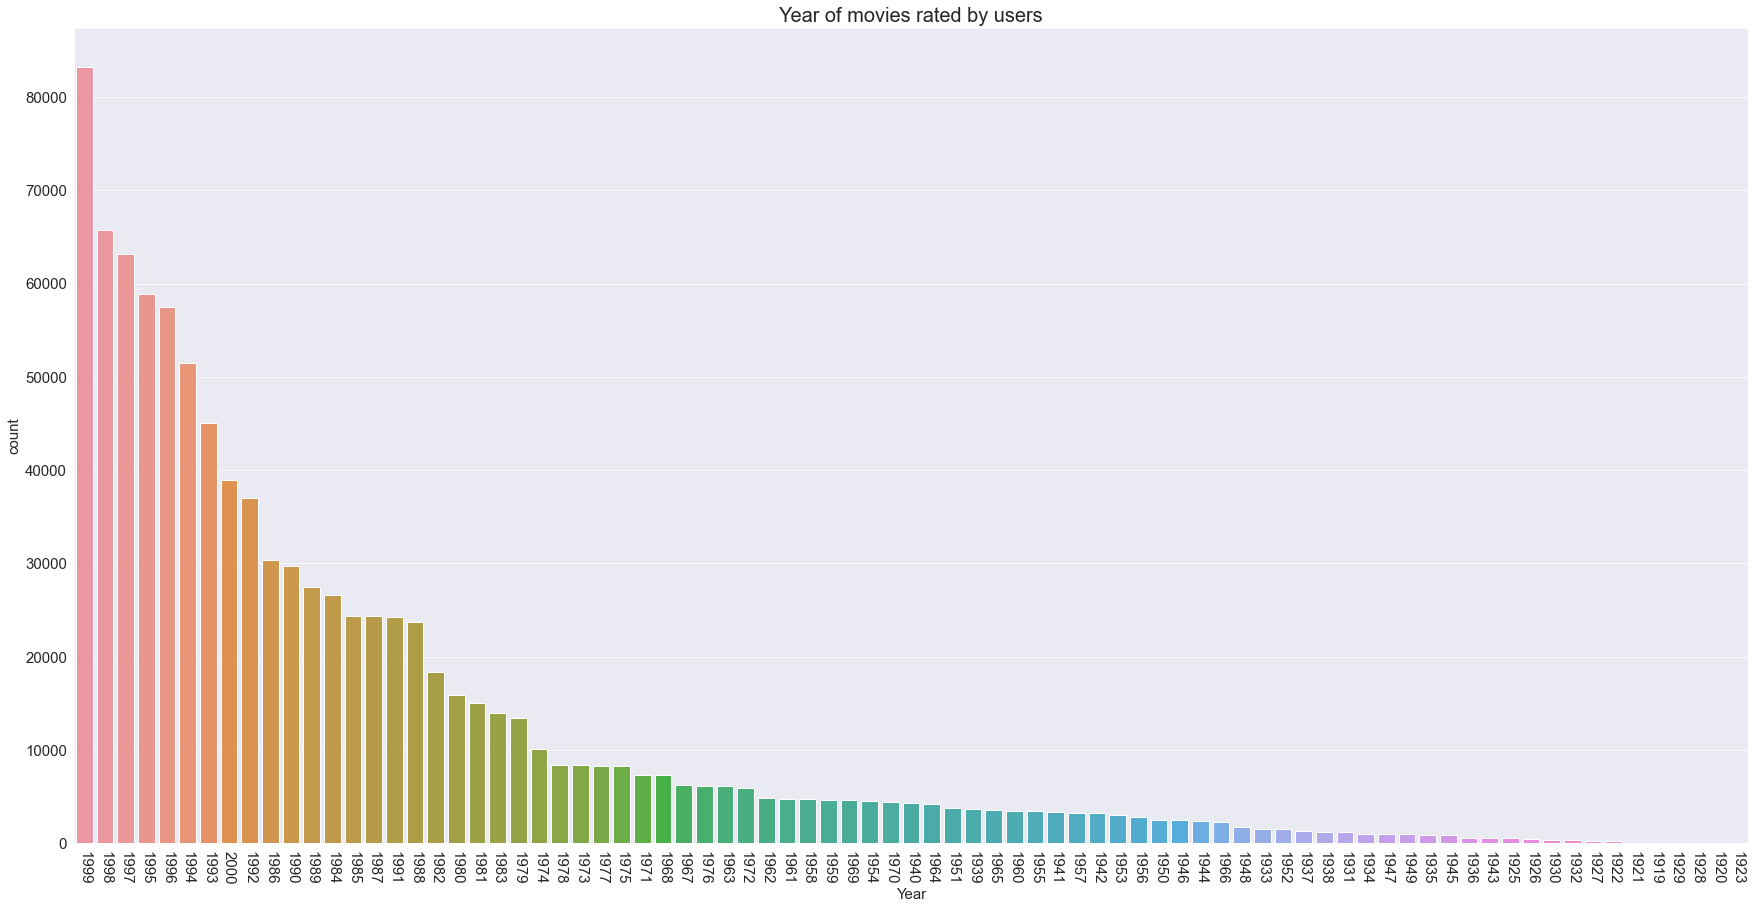

In [39]:
plt.subplots(figsize=(30,15))
sns.countplot(x='Year',order = df['Year'].value_counts().index, data = df)
plt.xticks(rotation = -90)
plt.title('Year of movies rated by users');

movies released in the year 1999 had the most number of ratings

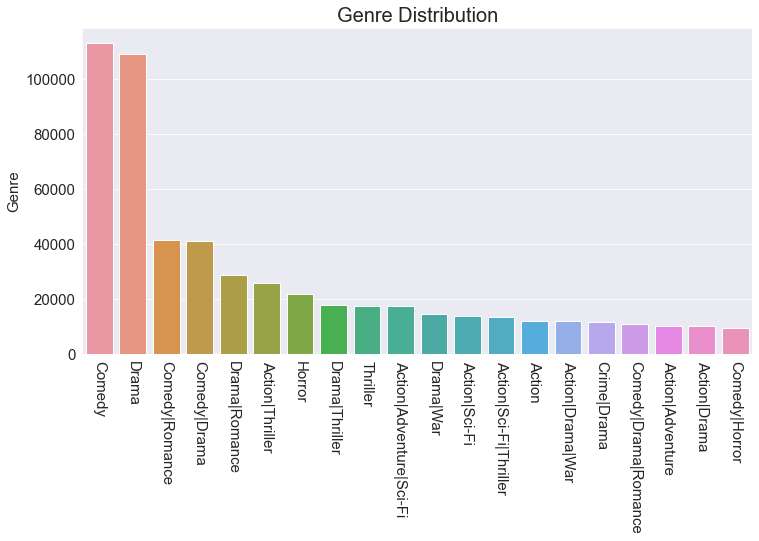

In [40]:
top_genres = df.Genre.value_counts().head(20)

plt.figure(figsize=(12,6))
plt.xticks(rotation = -90)
plt.title('Genre Distribution')
sns.barplot(x = top_genres.index, y =top_genres);

these are the top 20 genres that were rated by more number of users

Lets take the age group 18 to 28

In [41]:
agegrp18_28 = users.drop(users[users.Age>28].index)

In [42]:
agegrp18_28.describe()

,User Id,Age
count,3199.000000,3199.000000
mean,3048.410753,22.586433
std,1756.685416,3.327630
min,3.000000,18.000000
25%,1524.500000,18.000000
50%,3123.000000,25.000000
75%,4539.000000,25.000000
max,6040.000000,25.000000


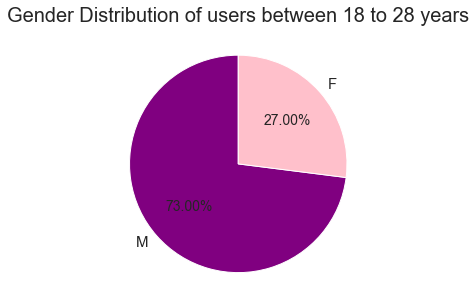

In [43]:
gender_pct2 = agegrp18_28.Gender.value_counts()*100/agegrp18_28.Gender.count()
gender_pct2 = gender_pct2.round()


plt.figure(figsize = (10,5))
plt.title('Gender Distribution of users between 18 to 28 years')
plt.pie(gender_pct2, labels = gender_pct2.index, autopct = '%.2f%%', startangle = 90, colors=['purple', 'pink']);

in this age group that we took 73% users are males  and the rest are females

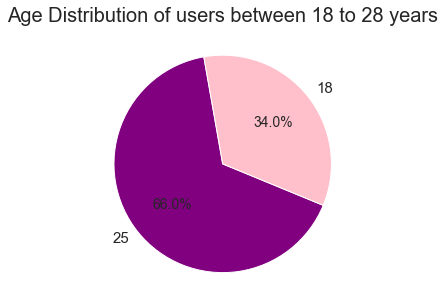

In [44]:
age_pct2 = agegrp18_28.Age.value_counts()*100/agegrp18_28.Age.count()
age_pct2 = age_pct2.round()

plt.figure(figsize = (10,5))
plt.title('Age Distribution of users between 18 to 28 years')
plt.pie(age_pct2, labels = age_pct2.index, autopct = '%1.1f%%', startangle = 100, colors=['purple', 'pink']);

in this age group that we took 66% of users are 25years old and the rest are 18 year olds

In [45]:
agegrp18_28 = df.drop(df[df.Age>28].index)

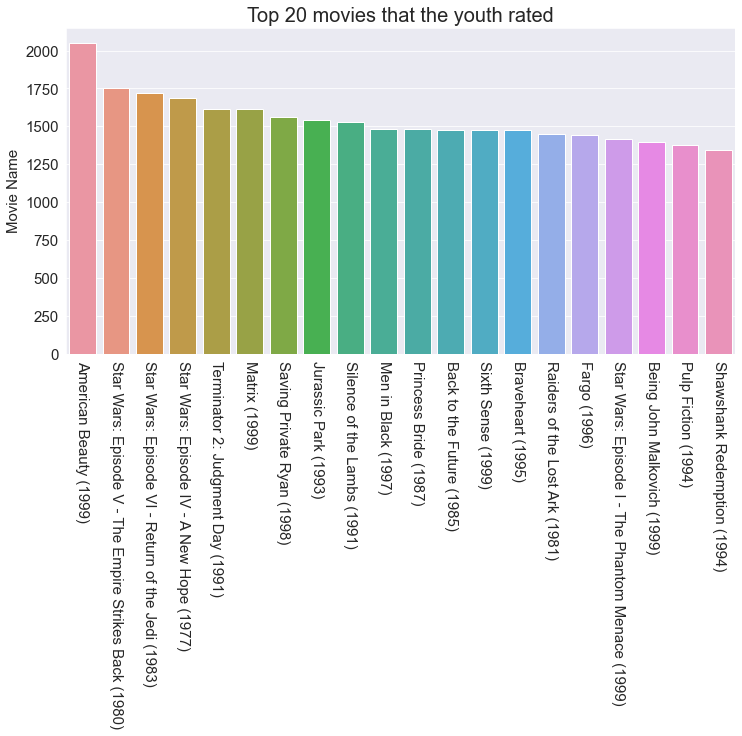

In [46]:
top_movies1 = agegrp18_28['Movie Name'].value_counts().head(20)

plt.figure(figsize=(12,6))
plt.xticks(rotation = -90)
plt.title('Top 20 movies that the youth rated')
sns.barplot(x = top_movies1.index, y = top_movies1);

American Beauty (1980) got the most number of ratings among the users in the age gro 18-28

lets now explore the dataset genderwise

In [47]:
dfwomen = df.drop(df[df.Gender == 'M'].index)

In [48]:
dfwomen = dfwomen.drop(columns = 'Gender')
dfwomen.head(1)

,Movie Id,Movie Name,Genre,Year,User Id,Movie Rating,Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,6,4,50


In [49]:
dfmen = df.drop(df[df.Gender == 'F'].index)
dfmen = dfmen.drop(columns = 'Gender')
dfmen.head(1)

,Movie Id,Movie Name,Genre,Year,User Id,Movie Rating,Age
71,1,Toy Story (1995),Animation|Children's|Comedy,1995,8,4,25


In [50]:
wage_pct = dfwomen.Age.value_counts()

In [51]:
mage_pct = dfmen.Age.value_counts()

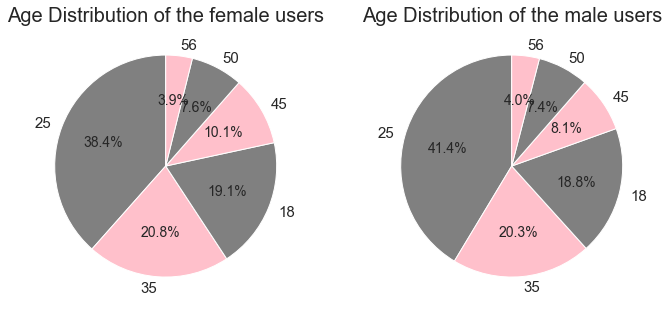

In [52]:
fig, axes = plt.subplots(1,2, figsize= (10,5))
plt.tight_layout(pad=2)
axes[0].set_title('Age Distribution of the female users')
axes[0].pie(wage_pct, labels = wage_pct.index, autopct = '%1.1f%%', startangle = 90, colors=['grey', 'pink']);



axes[1].set_title('Age Distribution of the male users')
axes[1].pie(mage_pct, labels = mage_pct.index, autopct = '%1.1f%%', startangle = 90, colors=['grey', 'pink']);

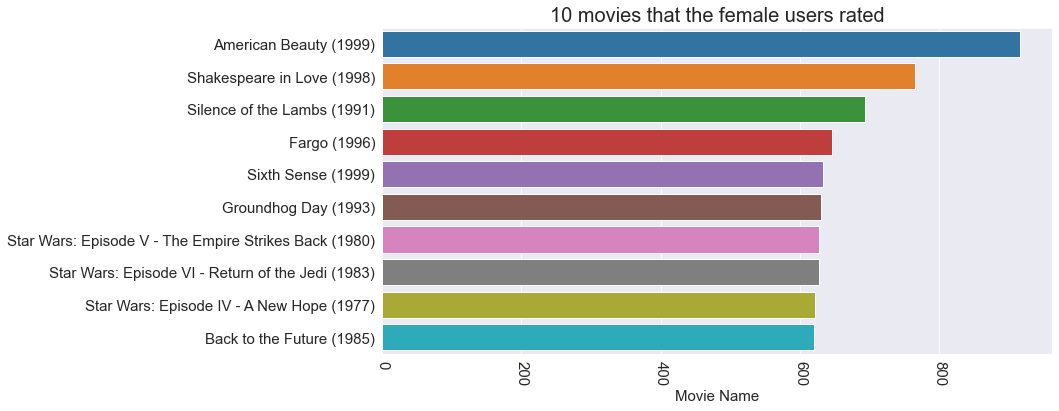

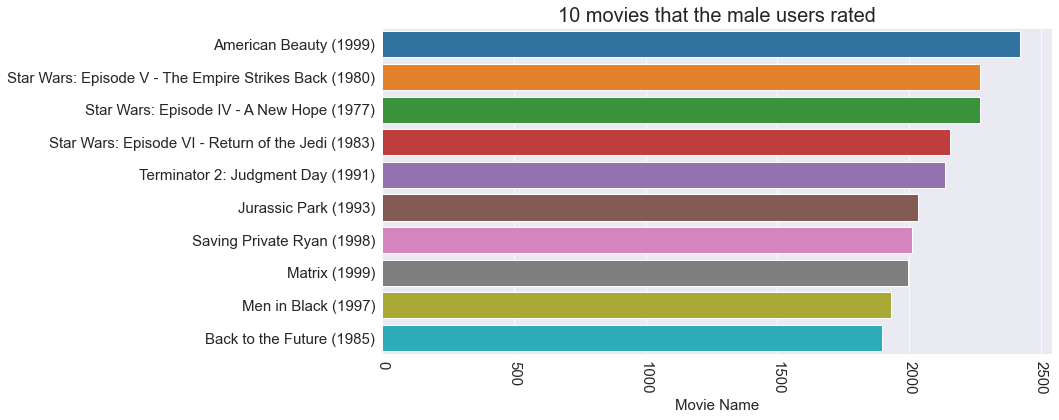

In [53]:
wtop_movies = dfwomen['Movie Name'].value_counts().head(10)
mtop_movies = dfmen['Movie Name'].value_counts().head(10)

plt.figure(figsize=(12,6))
plt.xticks(rotation = -90)
plt.title('10 movies that the female users rated')
sns.barplot(y = wtop_movies.index,x= wtop_movies);

plt.figure(figsize=(12,6))
plt.xticks(rotation = -90)
plt.title('10 movies that the male users rated')
sns.barplot(y = mtop_movies.index,x= mtop_movies);

the top 10 movies that got most number of user ratings

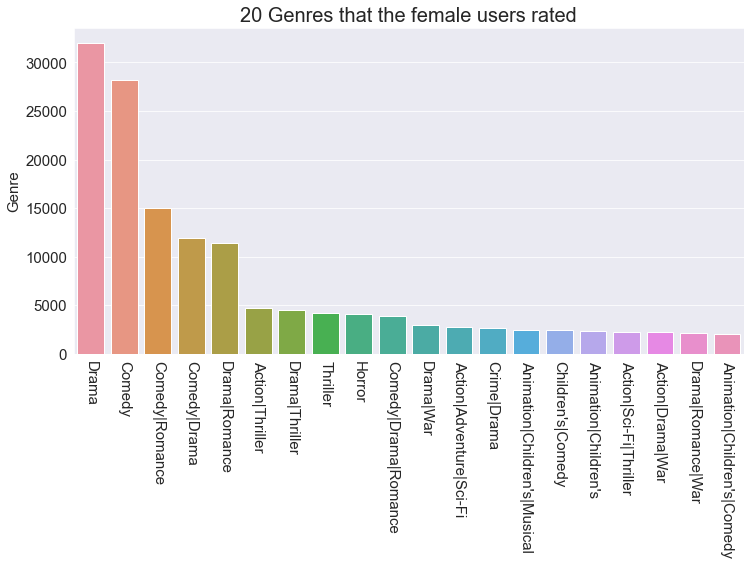

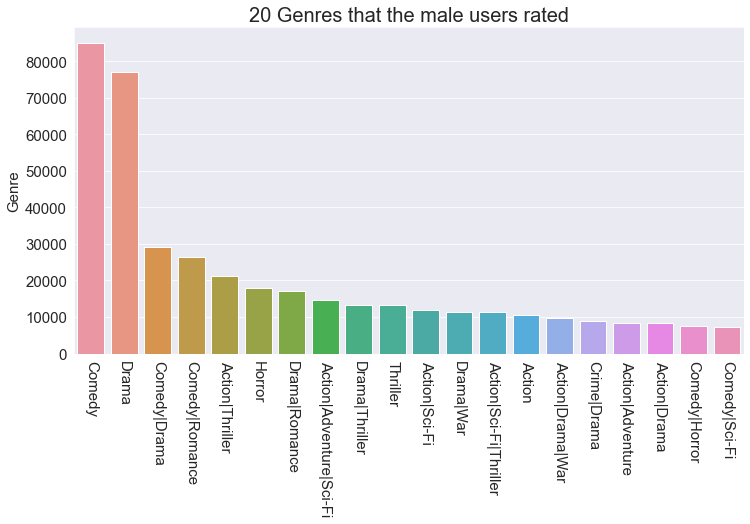

In [54]:
wtop_genres = dfwomen['Genre'].value_counts().head(20)
mtop_genres = dfmen['Genre'].value_counts().head(20)

plt.figure(figsize=(12,6))
plt.xticks(rotation = -90)
plt.title('20 Genres that the female users rated')
sns.barplot(x = wtop_genres.index, y = wtop_genres);

plt.figure(figsize=(12,6))
plt.xticks(rotation = -90)
plt.title('20 Genres that the male users rated')
sns.barplot(x = mtop_genres.index, y = mtop_genres);

Text(0.5, 1.0, 'Genre Distribution of the rated movies by male users')

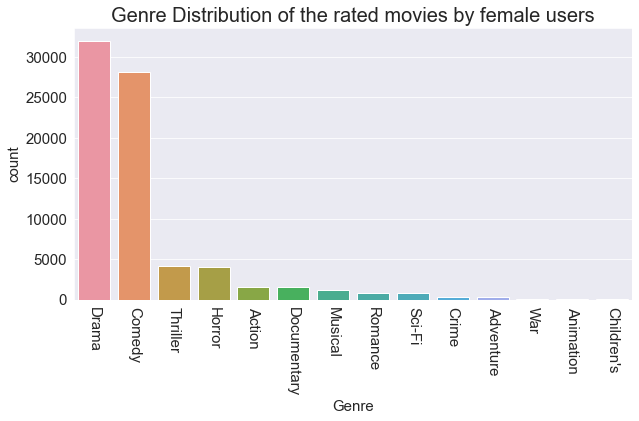

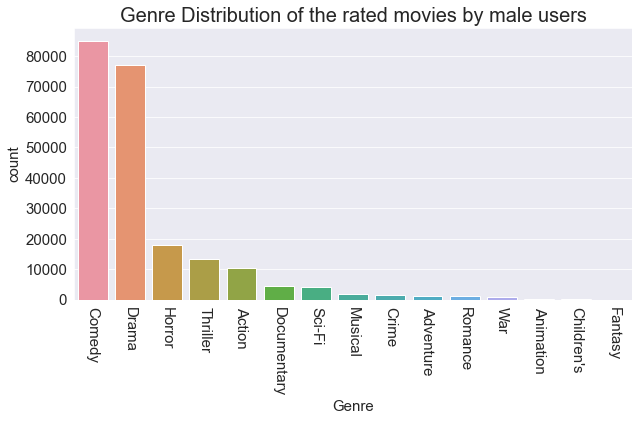

In [55]:
gendfw = dfwomen.loc[dfwomen['Genre'].isin(['Animation',"Children's",'Comedy','Adventure','Fantasy','Romance','Musical','Mystry','Drama','Action','Crime','Thriller','Horror','Sci-Fi','Documentary','War'])]
gendfm = dfmen.loc[dfmen['Genre'].isin(['Animation',"Children's",'Comedy','Adventure','Fantasy','Romance','Musical','Mystry','Drama','Action','Crime','Thriller','Horror','Sci-Fi','Documentary','War'])]


plt.subplots(figsize = (10,5))
sns.countplot(x = gendfw['Genre'], order = gendfw['Genre'].value_counts().index, data = gendfw)
plt.xticks(rotation = - 90)
plt.title('Genre Distribution of the rated movies by female users')

plt.subplots(figsize = (10,5))
sns.countplot(x = gendfm['Genre'], order = gendfm['Genre'].value_counts().index, data = gendfm)
plt.xticks(rotation = - 90)
plt.title('Genre Distribution of the rated movies by male users')

comedy has got the most number of ratings among the male users
among the female users the genre with the most the of ratings is comedy

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


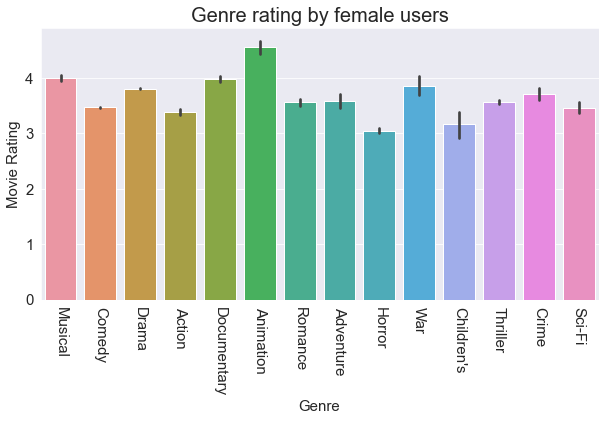

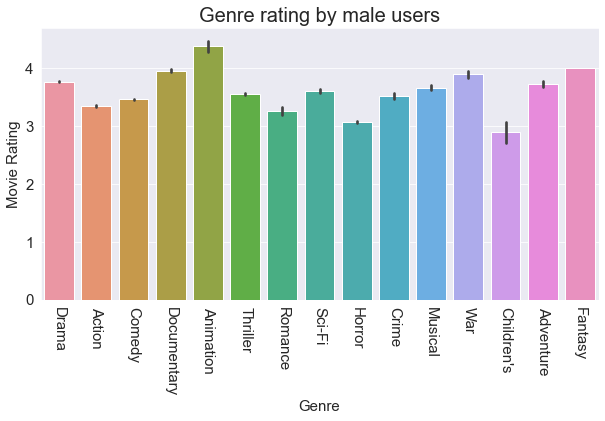

In [56]:
plt.subplots(figsize = (10,5))
plt.xticks(rotation = - 90)
plt.title('Genre rating by female users')
sns.barplot('Genre','Movie Rating', data=gendfw);

plt.subplots(figsize = (10,5))
plt.xticks(rotation = - 90)
plt.title('Genre rating by male users')
sns.barplot('Genre','Movie Rating', data=gendfm);

Most rated genre by males is animation followed by fantasy
most rated genre by females is animations followed by musicals

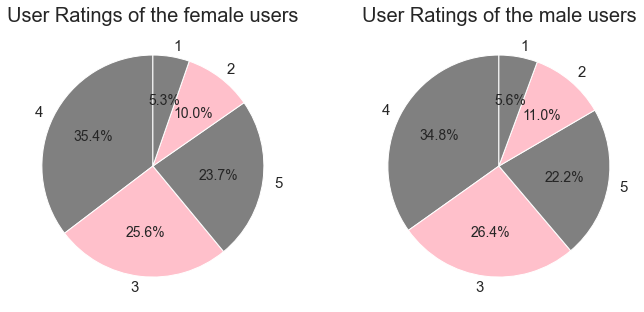

In [57]:
wrating_pct = dfwomen['Movie Rating'].value_counts()
mrating_pct = dfmen['Movie Rating'].value_counts()

fig, axes = plt.subplots(1,2, figsize= (10,5))
plt.tight_layout(pad=2)
axes[0].set_title('User Ratings of the female users')
axes[0].pie(wrating_pct, labels = wrating_pct.index, autopct = '%1.1f%%', startangle = 90, colors=['grey', 'pink']);

axes[1].set_title('User Ratings of the male users')
axes[1].pie(mrating_pct, labels = mrating_pct.index, autopct = '%1.1f%%', startangle = 90, colors=['grey', 'pink']);


1.User Age Distribution

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


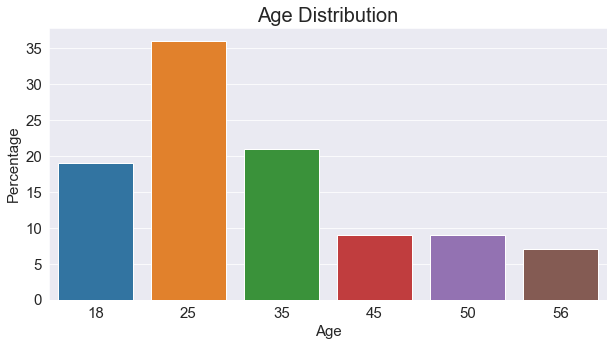

In [58]:
aage_pct = users.Age.value_counts()*100/users.Age.count()
aage_pct = aage_pct.round()

plt.figure(figsize=(10,5))
plt.title('Age Distribution')
sns.barplot( aage_pct.index,aage_pct)
plt.xlabel('Age')
plt.ylabel('Percentage');

35% of the total users are 25 yrs old.
Only slighlty more than 5% are 56 years old

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


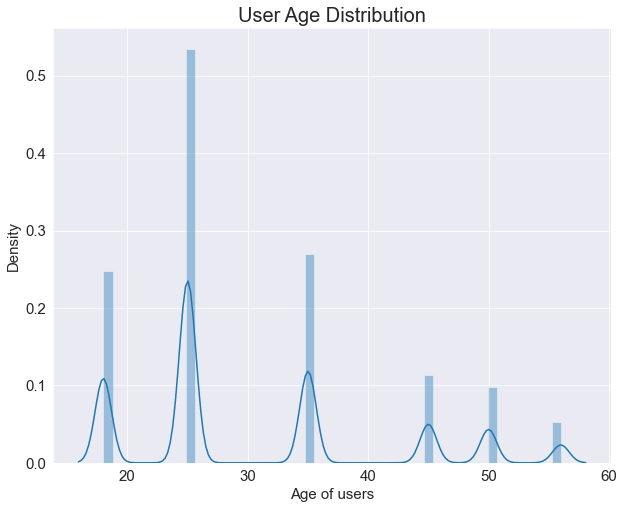

In [59]:
plt.subplots(figsize=(10,8))
sns.distplot(df.Age)
plt.xlabel('Age of users')
plt.title('User Age Distribution');

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


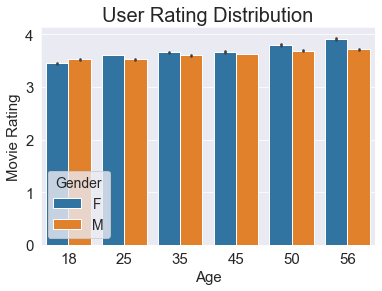

In [60]:
plt.title('User Rating Distribution')
sns.barplot('Age','Movie Rating',hue='Gender', data=df);

In [61]:
df['Age'].describe().round()

count    972998.0
mean         31.0
std          11.0
min          18.0
25%          25.0
50%          25.0
75%          35.0
max          56.0
Name: Age, dtype: float64

2.User rating of the movie “Toy Story”

In [62]:
df1 = df.reindex(columns = ['User Id','Gender','Age', 'Movie Id','Movie Name','Year','Movie Rating'])

In [63]:
ToyStory = df1.groupby(by=['Movie Name'])
ToyStory = ToyStory.get_group('Toy Story (1995)')
ToyStory = ToyStory.drop(columns=['Movie Id','Movie Name','Year'])
ToyStory

,User Id,Gender,Age,Movie Rating
0,6,F,50,4
71,8,M,25,4
210,9,M,25,5
316,10,F,35,5
717,18,F,18,4
...,...,...,...,...
555940,6022,M,25,5
555988,6025,F,25,5
556259,6032,M,45,4
556363,6035,F,25,4


In [64]:
ToyStory.isnull().sum()

User Id         0
Gender          0
Age             0
Movie Rating    0
dtype: int64

In [65]:
ToyStory.duplicated().sum()

0

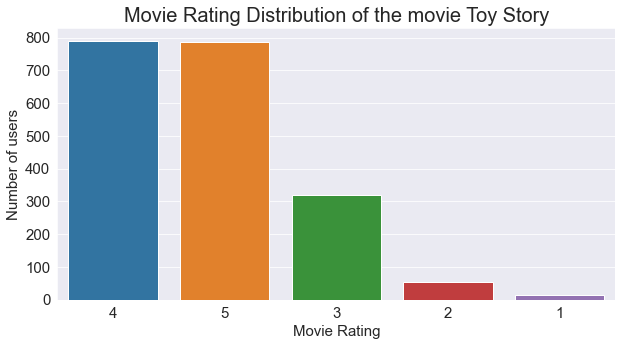

In [66]:
plt.subplots(figsize=(10,5))
sns.countplot(x=ToyStory['Movie Rating'], order = ToyStory['Movie Rating'].value_counts().index, data = ToyStory)
plt.ylabel('Number of users')
plt.title('Movie Rating Distribution of the movie Toy Story');

average rating is 4

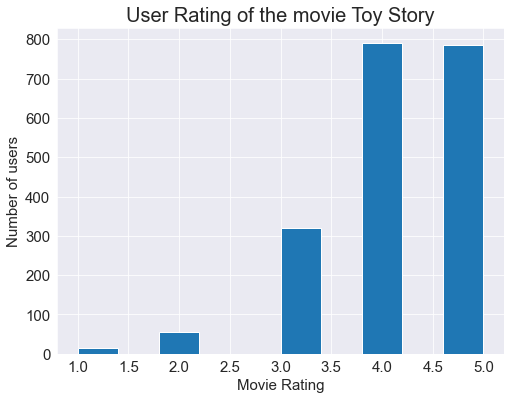

In [67]:
plt.figure(figsize = (8,6))
movies_grp = df.groupby('Movie Name')
TS =movies_grp.get_group('Toy Story (1995)')
TS['Movie Rating'].hist()
plt.title('User Rating of the movie Toy Story')
plt.xlabel('Movie Rating')
plt.ylabel('Number of users');

Toy Story got a rating of 4 by most users

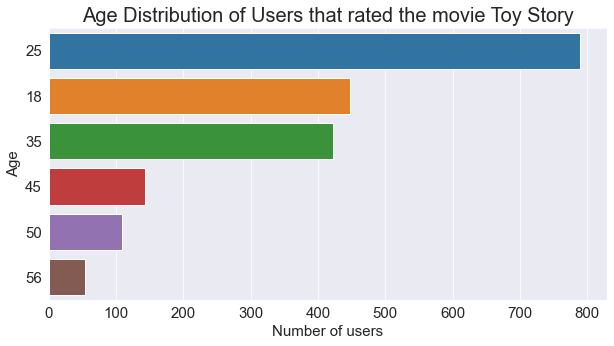

In [68]:
plt.subplots(figsize=(10,5))
sns.countplot(y = ToyStory['Age'], order = ToyStory['Age'].value_counts().index, data = ToyStory)
plt.xlabel('Number of users')
plt.title('Age Distribution of Users that rated the movie Toy Story');

Most of the users that rated this movie are around 25 years old

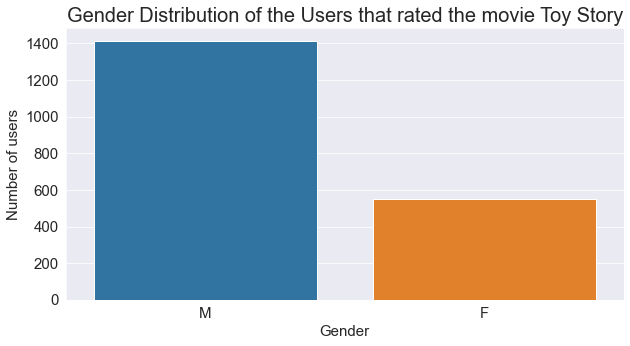

In [69]:
plt.subplots(figsize=(10,5))
sns.countplot(x = ToyStory['Gender'], order = ToyStory['Gender'].value_counts().index, data = ToyStory)
plt.ylabel('Number of users')
plt.title('Gender Distribution of the Users that rated the movie Toy Story');

Most of the movie ratings are given by males

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


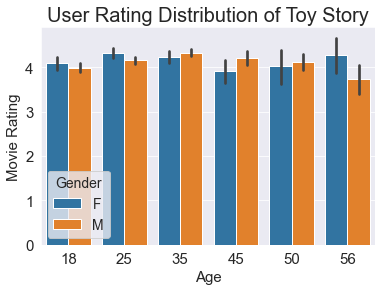

In [70]:
plt.title('User Rating Distribution of Toy Story')
sns.barplot('Age','Movie Rating',hue='Gender', data=ToyStory);

In [71]:
ToyStory= ToyStory.drop(columns=['User Id','Gender','Age'])

ToyStory.mode()

,Movie Rating
0,4


this is the average rating of toy story

In [72]:
ToyStory.min()

Movie Rating    1
dtype: int64

In [73]:
ToyStory.max()

Movie Rating    5
dtype: int64

the min rating given to this movie is 1, while max is 5

In [74]:
ToyStory['Movie Rating'].value_counts()

4    790
5    786
3    320
2     55
1     14
Name: Movie Rating, dtype: int64

this is the count of number of users that rated 4, 5, 3, 2 and 1 resp.

3.Top 25 movies by viewership rating

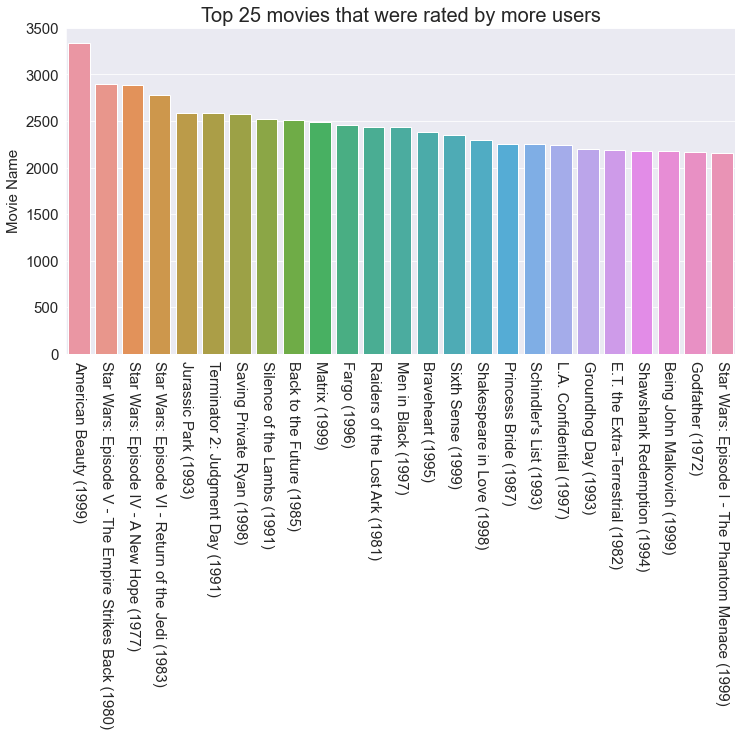

In [75]:
top_movies = df['Movie Name'].value_counts().head(25)

plt.figure(figsize=(12,6))
plt.xticks(rotation = -90)
plt.title('Top 25 movies that were rated by more users')
sns.barplot(x = top_movies.index, y = top_movies);

these are the top 20 genres that were rated by more number of users

average ratings of the movies

In [76]:
ravg = df.groupby('Movie Name')['Movie Rating'].mean().round()
ravg = ravg.sort_values(ascending = False)
ravg.head(25)

Movie Name
Godfather (1972)                                                       5.0
Smashing Time (1967)                                                   5.0
Bittersweet Motel (2000)                                               5.0
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    5.0
Shawshank Redemption (1994)                                            5.0
Lured (1947)                                                           5.0
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    5.0
Ulysses (Ulisse) (1954)                                                5.0
Gate of Heavenly Peace (1995)                                          5.0
One Little Indian (1973)                                               5.0
Close Shave (1995)                                                     5.0
Usual Suspects (1995)                                                  5.0
Schlafes Bruder (Brother of Sleep) (1995)                              5.0
Schindler's Li

number of ratings for the movies

In [77]:
rcount = df.groupby('Movie Name')['Movie Rating']
rcount = rcount.count().sort_values(ascending = False)
rcount[:25]

Movie Name
American Beauty (1999)                                   3336
Star Wars: Episode V - The Empire Strikes Back (1980)    2898
Star Wars: Episode IV - A New Hope (1977)                2890
Star Wars: Episode VI - Return of the Jedi (1983)        2783
Terminator 2: Judgment Day (1991)                        2583
Jurassic Park (1993)                                     2583
Saving Private Ryan (1998)                               2571
Silence of the Lambs (1991)                              2525
Back to the Future (1985)                                2516
Matrix (1999)                                            2491
Fargo (1996)                                             2460
Raiders of the Lost Ark (1981)                           2439
Men in Black (1997)                                      2438
Braveheart (1995)                                        2386
Sixth Sense (1999)                                       2350
Shakespeare in Love (1998)                               22

In [78]:
ravg_count = pd.DataFrame(data = ravg)
ravg_count['NumberOfRatings'] = pd.DataFrame(rcount)
ravg_count.head()

,Movie Rating,NumberOfRatings
Movie Name,,
Godfather (1972),5.0,2170
Smashing Time (1967),5.0,2
Bittersweet Motel (2000),5.0,1
I Am Cuba (Soy Cuba/Ya Kuba) (1964),5.0,5
Shawshank Redemption (1994),5.0,2181


In [79]:
ravg_count.describe()

,Movie Rating,NumberOfRatings
count,3702.000000,3702.000000
mean,3.246083,262.830362
std,0.733794,373.666598
min,1.000000,1.000000
25%,3.000000,32.000000
50%,3.000000,120.000000
75%,4.000000,341.750000
max,5.000000,3336.000000


top 25 movies by viewership

In [80]:
top25 = ravg_count[ravg_count['NumberOfRatings']>1000]
top25[:25]

,Movie Rating,NumberOfRatings
Movie Name,,
Godfather (1972),5.0,2170
Shawshank Redemption (1994),5.0,2181
Usual Suspects (1995),5.0,1750
Schindler's List (1993),5.0,2248
Galaxy Quest (1999),4.0,1659
Full Monty (1997),4.0,1169
Full Metal Jacket (1987),4.0,1230
Fugitive (1993),4.0,1946
Gattaca (1997),4.0,1051


these are top 25 that had more than 1000 user ratings

In [81]:
top25 = ravg_count[ravg_count['NumberOfRatings']>100]
top25[:25]

,Movie Rating,NumberOfRatings
Movie Name,,
Godfather (1972),5.0,2170
Shawshank Redemption (1994),5.0,2181
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),5.0,614
Close Shave (1995),5.0,623
Usual Suspects (1995),5.0,1750
Schindler's List (1993),5.0,2248
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),5.0,457
Wrong Trousers (1993),5.0,840
Harold and Maude (1971),4.0,682


top 25 that had more than 100 user ratings

4.Find the ratings for all the movies reviewed by for a particular user of user-id = 2696

In [82]:
userid2696 = df[df["User Id"] == 2696 ]

In [83]:
userid2696 = userid2696.drop(columns =['User Id','Age','Gender'])
userid2696.head()

,Movie Id,Movie Name,Genre,Year,Movie Rating
964205,350,Client (1994),Drama|Mystery|Thriller,1994,3
964206,800,Lone Star (1996),Drama|Mystery,1996,5
964207,1092,Basic Instinct (1992),Mystery|Thriller,1992,4
964208,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,1982,3
964209,1258,Shining (1980),Horror,1980,4


In [84]:
userid2696.isnull().sum()

Movie Id        0
Movie Name      0
Genre           0
Year            0
Movie Rating    0
dtype: int64

In [85]:
userid2696.duplicated().sum()

0

In [86]:
userid2696.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 964205 to 964224
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Id      20 non-null     int64 
 1   Movie Name    20 non-null     object
 2   Genre         20 non-null     object
 3   Year          20 non-null     int64 
 4   Movie Rating  20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 960.0+ bytes


In [87]:
userid2696.describe().round()

,Movie Id,Year,Movie Rating
count,20.0,20.0,20.0
mean,1759.0,1994.0,3.0
std,750.0,6.0,1.0
min,350.0,1980.0,1.0
25%,1267.0,1994.0,3.0
50%,1644.0,1997.0,4.0
75%,2004.0,1998.0,4.0
max,3386.0,1999.0,5.0


He has given a minimum rating as 1, maximum as 5
He rated 20 movies

In [88]:
userid2696

,Movie Id,Movie Name,Genre,Year,Movie Rating
964205,350,Client (1994),Drama|Mystery|Thriller,1994,3
964206,800,Lone Star (1996),Drama|Mystery,1996,5
964207,1092,Basic Instinct (1992),Mystery|Thriller,1992,4
964208,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,1982,3
964209,1258,Shining (1980),Horror,1980,4
964210,1270,Back to the Future (1985),Comedy|Sci-Fi,1985,2
964211,1589,Cop Land (1997),Crime|Drama|Mystery,1997,3
964212,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,1997,4
964213,1625,Game (1997),Mystery|Thriller,1997,4
964214,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,1997,2


Text(0.5, 1.0, 'Movie Rating Distribution of User-iD 2696')

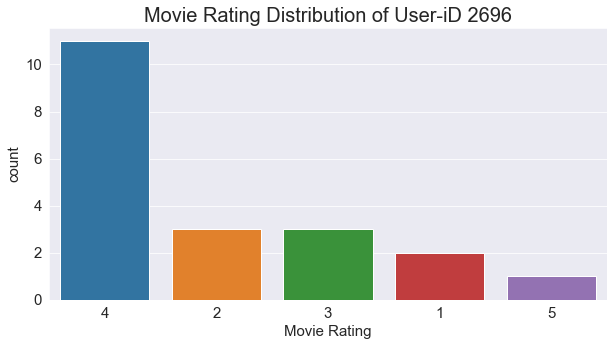

In [89]:
plt.subplots(figsize=(10,5))
sns.countplot(x=userid2696['Movie Rating'], order = userid2696['Movie Rating'].value_counts().index, data = userid2696)
plt.title('Movie Rating Distribution of User-iD 2696')

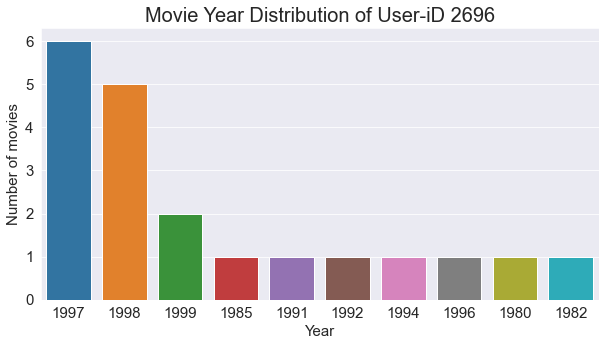

In [90]:
plt.subplots(figsize=(10,5))
sns.countplot(x=userid2696['Year'], order = userid2696['Year'].value_counts().index, data = userid2696)
plt.title('Movie Year Distribution of User-iD 2696')
plt.ylabel('Number of movies');

Most of the movies rated by this user were made in 1997

In [91]:
usertop = userid2696.sort_values(['Movie Rating'], ascending = False)
usertop.drop(columns =['Genre','Movie Id', 'Year'])

,Movie Name,Movie Rating
964206,Lone Star (1996),5
964215,Devil's Advocate (1997),4
964217,Palmetto (1998),4
964207,Basic Instinct (1992),4
964223,Talented Mr. Ripley (1999),4
964209,Shining (1980),4
964221,Psycho (1998),4
964219,Perfect Murder (1998),4
964212,L.A. Confidential (1997),4
964213,Game (1997),4


The movie Lone Star (1996) was rated the highest by this user while JKF (1991) got the least rating

In [92]:
gen_count = userid2696['Genre'].value_counts()
len(gen_count)

15

<AxesSubplot:ylabel='Genre'>

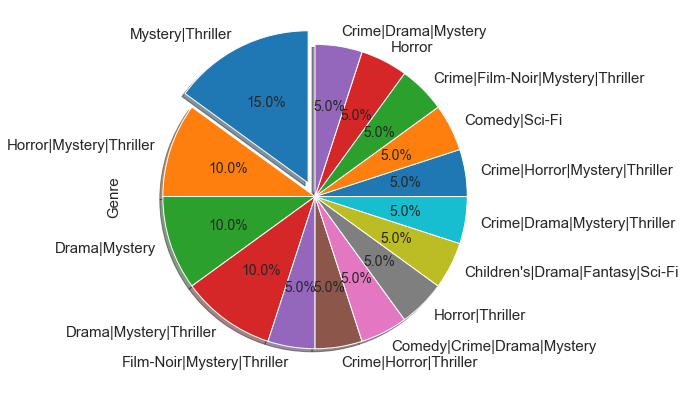

In [93]:
gen_count.plot(kind = 'pie', figsize = (8,7), shadow = True, explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0), autopct = '%1.1f%%', startangle = 90 )

Among the movies he rated, there were most movies of the genre 'Mystry/Thriller'

Finding out all the unique genres

In [94]:
G = df['Genre']
G.nunique()

301

There are 301 unique genre combinations

In [95]:
G.unique()

array(["Animation|Children's|Comedy", 'Drama|Romance',
       "Children's|Comedy|Drama", "Animation|Children's|Musical|Romance",
       'Drama|Musical', 'Drama|Romance|War|Western', 'Crime|Drama',
       "Animation|Children's|Musical", 'Action|Comedy|Western',
       'Action|Romance|Thriller', 'Western', "Children's|Comedy",
       "Animation|Children's|Comedy|Musical", 'Adventure|Drama|Western',
       'Comedy|Romance', 'Comedy|Drama|Romance', 'Drama|Romance|War',
       'Musical|Romance', "Children's|Comedy|Western",
       "Children's|Comedy|Musical",
       "Adventure|Animation|Children's|Musical", 'Musical',
       'Action|Romance', 'Action|Adventure|Romance|Sci-Fi|War',
       'Comedy|Musical|Romance',
       "Adventure|Animation|Children's|Comedy|Musical",
       'Drama|Romance|Thriller', "Adventure|Children's|Comedy",
       'Action|Adventure|Romance', "Children's|Fantasy|Musical",
       "Animation|Children's|Comedy|Musical|Romance",
       'Comedy|Fantasy|Romance', 'Comedy',


Create a separate column for each genre category with a one - hot encoding (1 and 0) whether or not the movie belongs to that genre.

In [96]:
df_genre = pd.concat([df.drop('Genre', axis=1), df.Genre.str.get_dummies(sep='|')], axis = 1)
df_genre = df_genre.drop(columns = ['Gender','Age','Year'])

In [97]:
df_genre.sample(10)

,Movie Id,Movie Name,User Id,Movie Rating,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
416946,586,Home Alone (1990),4425,4,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
790726,296,Pulp Fiction (1994),238,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
76533,2986,Robocop 2 (1990),880,2,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
446712,2792,Airplane II: The Sequel (1982),4754,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
131560,1283,High Noon (1952),1422,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
835336,2526,Meteor (1979),5096,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
138967,3536,Keeping the Faith (2000),1491,4,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
159571,476,Inkwell (1994),1687,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
893240,2762,Sixth Sense (1999),5194,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
957869,1304,Butch Cassidy and the Sundance Kid (1969),2550,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
gendf = df.loc[df['Genre'].isin(['Animation',"Children's",'Film-Noir','Western','Comedy','Adventure','Fantasy','Romance','Musical','Mystry','Drama','Mystery','Action','Crime','Thriller','Horror','Sci-Fi','Documentary','War'])]

In [99]:
gendf['Genre'].unique()

array(['Western', 'Musical', 'Comedy', 'Drama', 'Action', 'Documentary',
       'Animation', 'Thriller', 'Romance', 'Adventure', 'Horror', 'War',
       "Children's", 'Sci-Fi', 'Crime', 'Mystery', 'Film-Noir', 'Fantasy'],
      dtype=object)

Text(0.5, 1.0, 'Genre Distribution Of the rated movies')

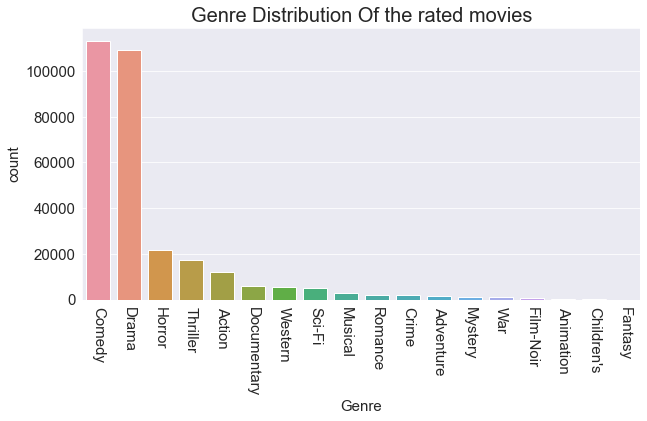

In [100]:
plt.subplots(figsize = (10,5))
sns.countplot(x = gendf['Genre'], order = gendf['Genre'].value_counts().index, data = gendf)
plt.xticks(rotation = - 90)
plt.title('Genre Distribution Of the rated movies')

This graph shows which of the genres got the most number of user ratings among all the 18 unique genres
Comedy is the most prolific genre with more than 100,000 user entries. Drama follows. 
Other genres can be easily paired with them to increase rating count, i.e. Romantic Comedies or Musical Dramas. 

Determine the features affecting the ratings of any particular movie.

In [101]:
avg_rating = ratings.groupby('Movie Id', as_index = False).mean()
avg_rating = avg_rating.drop(columns = 'User Id')
avg_rating = avg_rating.round()

<AxesSubplot:>

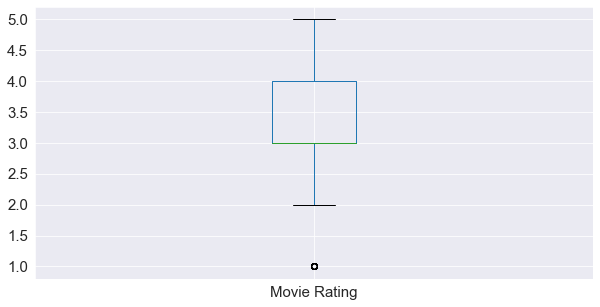

In [102]:
avg_rating.boxplot(column='Movie Rating', figsize = (10,5))

In [103]:
mean_ratings1 = gendf.groupby(['Genre','Year'], as_index = False)['Movie Rating'].agg(['mean'])

In [104]:
mean_ratings1.sort_values(by= 'mean',ascending=False)

mean
Genre       Year          
Adventure   1954  5.000000
Crime       1947  5.000000
Film-Noir   1950  4.501094
Animation   1996  4.453461
Documentary 1989  4.444444
...                    ...
Horror      1969  1.666667
            1975  1.500000
Adventure   1989  1.166667
Romance     1949  1.000000
Western     1958  1.000000

[391 rows x 1 columns]

In [105]:
gens = ['Animation',"Children's",'Western','Comedy','Film-Noir','Adventure','Mystery','Fantasy','Romance','Musical','Drama','Action','Crime','Thriller','Horror','Sci-Fi','Documentary','War']
df1 = pd.DataFrame()
for g in gens:
  g1 = mean_ratings1.loc[g]
  s1 = g1.loc[:]['mean']
  s1 = pd.Series(s1)
  df1 = pd.concat([df1,s1], axis=1)

df1.columns = gens

<AxesSubplot:>

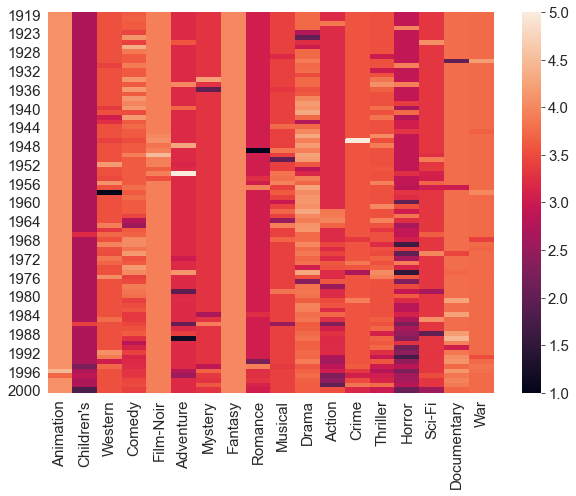

In [106]:
plt.subplots(figsize = (10,7))
sns.heatmap(df1.fillna(df1.mean()))

Here we can see that Animation and film-Noir the most rated genre throught the years(movie release) followed by war and documentries. 
Childrens category and horror were had low ratings. specially horror movies showed a lot of variations 
ratings of adventure, comdey and western aren't too bad

<AxesSubplot:>

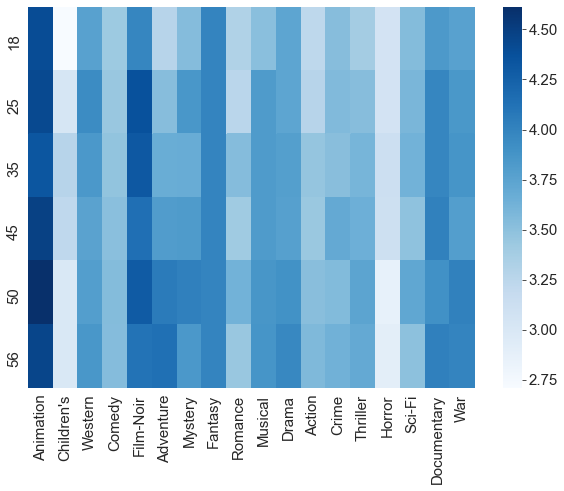

In [107]:
mean_ratings2 = gendf.groupby(['Genre','Age'], as_index = False)['Movie Rating'].agg(['mean'])

df11 = pd.DataFrame()
for g in gens:
  g1 = mean_ratings2.loc[g]
  s1 = g1.loc[:]['mean']
  s1 = pd.Series(s1)
  df11 = pd.concat([df11,s1], axis=1)

df11.columns = gens
plt.subplots(figsize = (10,7))
sns.heatmap(df11.fillna(df11.mean()), cmap='Blues')

This is a heatmap of users age vs genres
here also the childrens genre and horror, users showed least intrest towards them
animation is liked the most throughout all ages followed by film-noir
documnetries are rated the most by 56yr olds
the age gro of 18 to 25 have hardly given any genres good ratings.
horror has the least rating throughout all age groups

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


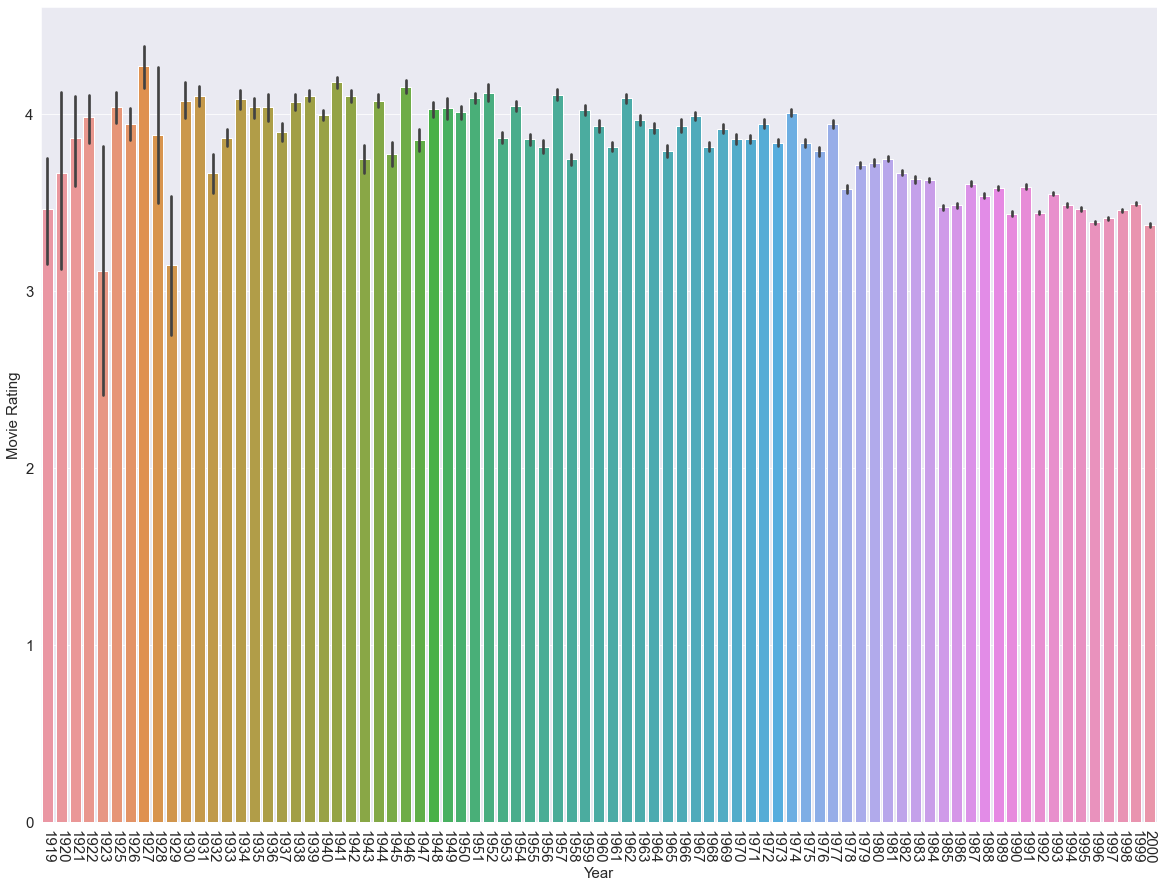

In [113]:
plt.subplots(figsize = (20,15))
sns.barplot('Year','Movie Rating', data=df)
plt.xticks(rotation=-90);

if we look at this graph we can see that rating of movies towards 2000 is decreasing slightly
between 1922 and 1935 we can see the highest rating as well as the lowest mean rating

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


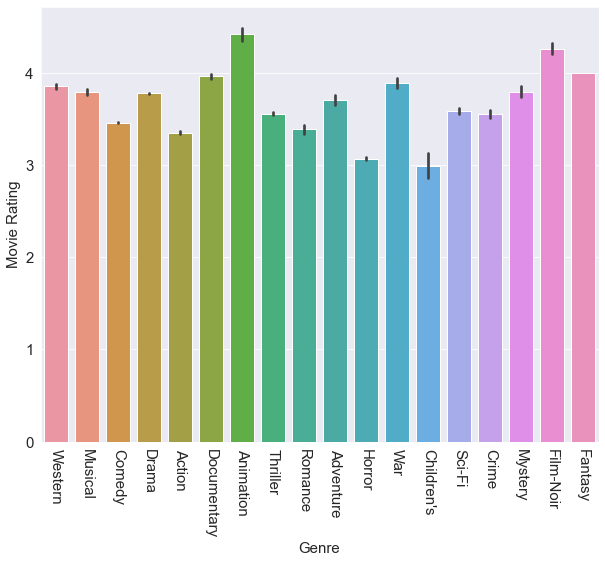

In [112]:
plt.subplots(figsize = (10,8))
sns.barplot('Genre','Movie Rating', data=gendf)
plt.xticks(rotation=-90);

Animation is the Highest rated genre. Other genres can be easily paired with it to increase ratings

thus we can conclude that age of the users and genres of the movie affect the movie rating. Even the release year of the movies can affect the ratings